In [9]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import association_rules
from matplotlib import pyplot as plt

### Read true.csv file and label it with 1


In [4]:
true_df = pd.read_csv(r"True.csv", sep=",")
true_df["label"] = 1
true_df.sample(5)

,title,text,subject,date,label
1077,U.S. officials will not label treatment of Roh...,WASHINGTON (Reuters) - U.S. government officia...,politicsNews,"October 24, 2017",1
16648,Six crew from German ship kidnapped in Nigeria...,BERLIN (Reuters) - Six crew from a German cont...,worldnews,"October 24, 2017",1
21220,Arsonists attack building used by controversia...,MOSCOW (Reuters) - Attackers set fire to a bui...,worldnews,"August 31, 2017",1
5910,Airlines in Cairo asked to implement Trump tra...,CAIRO (Reuters) - Airlines operating at Cairo ...,politicsNews,"January 29, 2017",1
9468,Senate Banking committee approves two SEC nomi...,WASHINGTON (Reuters) - The U.S. Senate Banking...,politicsNews,"May 19, 2016",1


### Read fake.csv file and label it with 0


In [5]:
fake_df = pd.read_csv(r"Fake.csv", sep=",")
fake_df["label"] = 0
fake_df.sample(5)

,title,text,subject,date,label
14334,"COUNT THE CLINTON LIES 1,2,3…. [Video]",How many? I think we ve lost count!,politics,"Mar 10, 2016",0
16292,FINALLY! THE 538 ELECTORAL COLLEGE MEMBERS Cas...,WHAT YOU NEED TO KNOW:In all 50 state capitals...,Government News,"Dec 19, 2016",0
13712,TERROR GROUP PLANS VIOLENCE AGAINST TRUMP SUPP...,This call to violence by the Left against inno...,politics,"Jun 11, 2016",0
10802,WHAT THE MEDIA’S NOT TELLING YOU About The Man...,Just another nice immigrant family trying to a...,politics,"May 23, 2017",0
1183,Trump Biographer: The Donald Has A Long Histo...,Donald Trump has made quite the fuss about tap...,News,"June 11, 2017",0


### Combine true and fake news in one dataframe


In [6]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
19747,Bangladesh sets aside rift with Myanmar to eas...,DHAKA (Reuters) - Bangladesh is to buy rice fr...,worldnews,"September 18, 2017",1
13465,Russian PM says U.S.-Russia ties at low ebb bu...,MOSCOW (Reuters) - Russian Prime Minister Dmit...,worldnews,"November 30, 2017",1
14371,German coalition talks collapse is 'bad news f...,BRUSSELS (Reuters) - The collapse of German Ch...,worldnews,"November 20, 2017",1
1729,Trump says violence by anti-fascists proves hi...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",1
43980,Snowden Laughs-off CIA Excuse of ‘Mistakenly D...,21st Century Wire says This week s announcemen...,US_News,"May 20, 2016",0
39746,LIBERAL NIGHTMARE! HUNDREDS OF VOTERS WITHDRAW...,"If this keeps up, the Democrats will never win...",left-news,"Jul 12, 2017",0
5954,Trump to halt refugee flow from some Muslim-ma...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 27, 2017",1
31523,“HOW CAN WE GET BEHIND SUCH CORRUPTION?” CNN P...,The video below is a classic from the campaig...,politics,"Aug 19, 2017",0
9271,"Obama to visit Poland, Spain in NATO summit tr...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"June 6, 2016",1
2829,Senate intel panel to seek testimony from Trum...,(Reuters) - The U.S. Senate’s intelligence com...,politicsNews,"July 11, 2017",1


### Produce a Frequency-Term Table out of the datafarame


In [7]:
vectorizer = CountVectorizer(stop_words='english', max_features=250)
matrix = vectorizer.fit_transform(all_news_df["title"] + " " + all_news_df["text"])

In [8]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df

,000,10,2016,2017,according,act,added,administration,agency,al,...,white,win,women,won,work,working,world,year,years,york
0,0,2,0,0,0,0,0,2,0,0,...,1,0,0,0,1,0,0,0,3,0
1,0,0,0,1,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,2,0,0,...,1,0,0,0,0,0,0,1,0,2
3,0,0,2,0,1,0,0,0,0,1,...,3,0,0,0,0,0,0,1,0,3
4,0,0,1,1,5,0,0,0,2,0,...,1,0,0,0,0,0,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0,1,1,0,2,2,0,2,0,0,...,0,0,0,0,0,0,2,0,0,1
44894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
44895,2,0,1,0,2,1,0,2,0,17,...,0,1,3,1,5,0,4,1,6,2
44896,1,0,1,0,0,0,0,0,0,10,...,0,0,0,0,1,0,0,1,0,0


### min-apriori algorithm implementation

In [10]:
#min-apriori implementation

def normalize_columns(tf_df):
    X = tf_df.to_numpy(dtype=np.float64)
    col_sum = X.sum(axis=0)
    if np.any(col_sum == 0):
        raise ValueError("Zero-frequency term detected")
    return X / col_sum


def support_itemsets(X, candidates):
    supports = []
    for itemset in candidates:
        X_sub = X[:, list(itemset)]
        supports.append(np.min(X_sub, axis=1).sum())
    return np.array(supports)


def generate_candidates(prev_freq, k):
    prev_freq = sorted(prev_freq)
    Ck = []

    for i in range(len(prev_freq)):
        for j in range(i + 1, len(prev_freq)):
            if prev_freq[i][:-1] == prev_freq[j][:-1]:
                c = prev_freq[i] + (prev_freq[j][-1],)
                if all(tuple(sorted(s)) in prev_freq for s in combinations(c, k - 1)):
                    Ck.append(c)
            else:
                break
    return Ck


def min_apriori_words(tf_df, min_support):
    X = normalize_columns(tf_df)
    terms = tf_df.columns.tolist()

    # --- 1-itemsets (must exist)
    C1 = [(i,) for i in range(X.shape[1])]
    S1 = support_itemsets(X, C1)

    print("DEBUG: min/max 1-item support:", S1.min(), S1.max())

    freq = {c: s for c, s in zip(C1, S1) if s >= min_support}

    if not freq:
        raise RuntimeError("No frequent 1-itemsets — support threshold too high or bug")

    Lk = list(freq.keys())
    k = 2

    while Lk:
        Ck = generate_candidates(Lk, k)
        if not Ck:
            break

        Sk = support_itemsets(X, Ck)

        Lk = []
        for c, s in zip(Ck, Sk):
            if s >= min_support:
                freq[c] = s
                Lk.append(c)
        k += 1

    return pd.DataFrame(
        {
            "itemsets": [[terms[i] for i in k] for k in freq],
            "support": list(freq.values()),
        }
    ).sort_values("support", ascending=False)


### Produce Frequent Itemsets


In [ ]:
freq_items = min_apriori_words(sparse_df, min_support=0.1)
freq_items.head(20)

DEBUG: min/max 1-item support: 0.9999999999999998 1.0000000000000002


,itemsets,support
75,[federal],1.0
113,[later],1.0
94,[home],1.0
235,[washington],1.0
25,[called],1.0
28,[candidate],1.0
29,[case],1.0
24,[business],1.0
26,[came],1.0
1,[10],1.0


In [12]:
freq_items.sample(20)

,itemsets,support
16603,"[president, said]",0.452922
8369,"[earlier, killed]",0.110403
1047,"[act, good]",0.108945
997,"[act, america]",0.137524
23244,"[candidate, donald, republican, trump]",0.102550
21671,"[just, new, time]",0.133646
6500,"[days, end]",0.150443
17279,"[right, rights]",0.155006
12738,"[law, state]",0.228613
11136,"[hillary, state]",0.168801


### List the top 20 popular words


In [13]:
freq_words = freq_items[freq_items["itemsets"].apply(len) == 1]
frequent_words_sorted = freq_words.sort_values(by="support", ascending=False)
top_20 = frequent_words_sorted.head(20)
top_20

,itemsets,support
75,[federal],1.0
113,[later],1.0
94,[home],1.0
235,[washington],1.0
25,[called],1.0
28,[candidate],1.0
29,[case],1.0
24,[business],1.0
26,[came],1.0
1,[10],1.0


### Bar plot visualization of the 20 top popular words
#### IMPORTANT NOTE, When use min-apriori all 1-itemsets has the same support which equals to 1 because of the normalization step.


C:\Users\ibrahima\AppData\Local\Temp\ipykernel_18920\487118267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20["itemsets_str"] = top_20["itemsets"].apply(lambda x: ", ".join(list(x)))


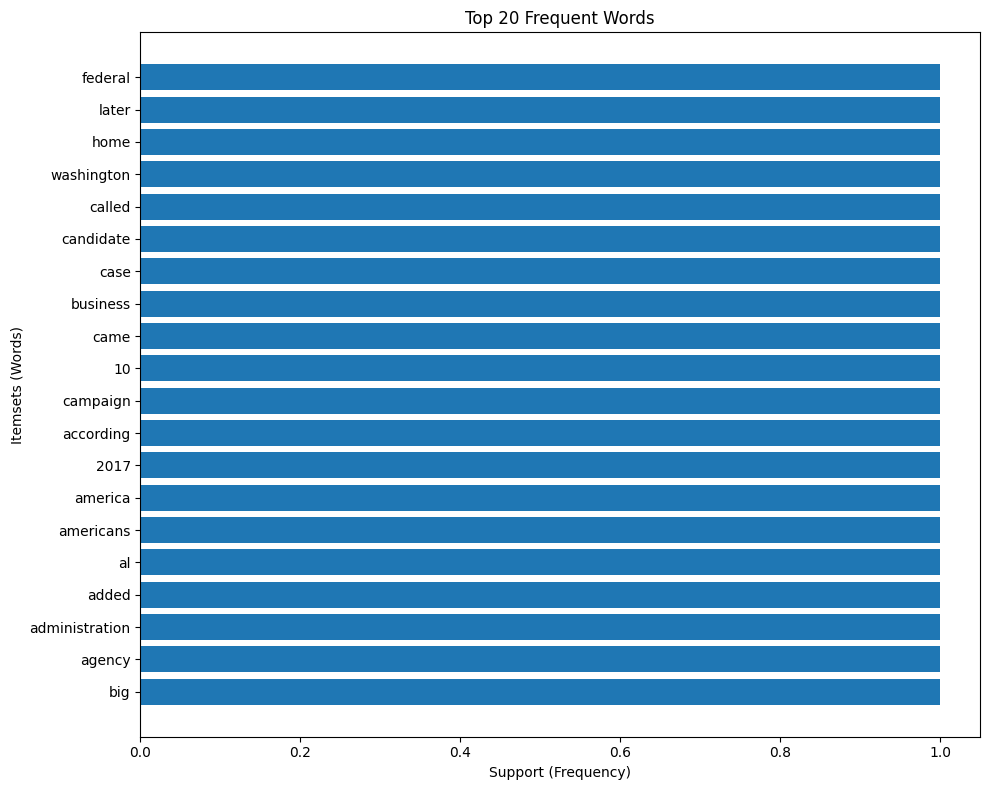

In [16]:
top_20["itemsets_str"] = top_20["itemsets"].apply(lambda x: ", ".join(list(x)))
plt.figure(figsize=(10, 8))
plt.barh(top_20["itemsets_str"], top_20["support"])
plt.xlabel("Support (Frequency)")
plt.ylabel("Itemsets (Words)")
plt.title("Top 20 Frequent Words")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets


In [17]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(20)

201 rules generated.


C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: divide by zero encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
92,"(pic, trump)","(twitter, com)",0.123567,0.563646,0.117369,0.949838,1.685168,1.0,0.047721,8.698967e+00,0.463912,0.205967,8.850438e-01,0.579035
123,"(donald, pic)","(twitter, com)",0.122695,0.563646,0.110635,0.901704,1.599769,1.0,0.041478,4.439172e+00,0.427343,0.192172,7.747328e-01,0.548994
90,"(twitter, pic, trump)",(com),0.118278,1.000000,0.117369,0.992319,0.992319,1.0,-0.000908,1.445493e-14,-0.008702,0.117263,-6.918056e+13,0.554844
15,"(twitter, 2017, com)",(pic),0.177574,1.000000,0.174658,0.983580,0.983580,1.0,-0.002916,0.000000e+00,-0.019895,0.174150,0.000000e+00,0.579119
73,"(pic, trump)",(com),0.123567,1.000000,0.121402,0.982475,0.982475,1.0,-0.002165,6.335171e-15,-0.019946,0.121140,-1.578489e+14,0.551939
48,"(twitter, video, pic)",(com),0.136852,1.000000,0.134341,0.981651,0.981651,1.0,-0.002511,6.050729e-15,-0.021196,0.134005,-1.652693e+14,0.557996
61,"(just, twitter, pic)",(com),0.130140,1.000000,0.127596,0.980457,0.980457,1.0,-0.002543,5.680858e-15,-0.022402,0.127273,-1.760297e+14,0.554027
125,"(like, twitter, pic)",(com),0.113102,1.000000,0.110527,0.977239,0.977239,1.0,-0.002574,4.877693e-15,-0.025590,0.110244,-2.050149e+14,0.543883
55,"(china, north, nuclear)",(korea),0.134373,1.000000,0.131235,0.976651,0.976651,1.0,-0.003137,0.000000e+00,-0.026876,0.130825,0.000000e+00,0.553943
23,"(north, nuclear, south)",(korea),0.160091,1.000000,0.156255,0.976037,0.976037,1.0,-0.003836,0.000000e+00,-0.028400,0.155658,0.000000e+00,0.566146


### Scatterplot of the rules was generated (between support and confidence)


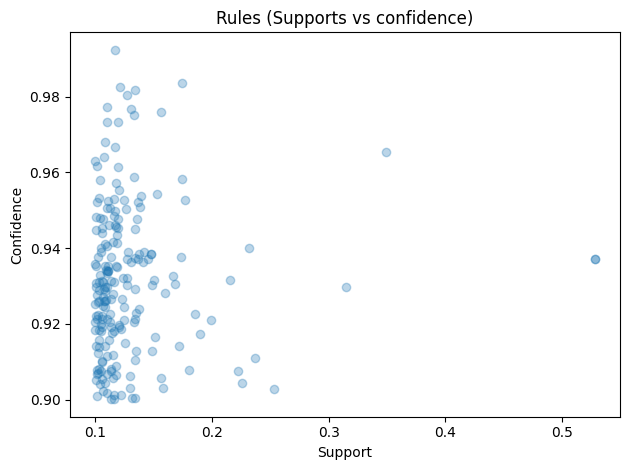

In [18]:
plt.scatter(rules["support"], rules["confidence"], alpha=0.3)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Rules (Supports vs confidence)")
plt.gca()
plt.tight_layout()

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(twitter, com)",(pic),0.563646,1.0,0.528142,0.937009,0.937009,1.0,-0.035504,0.000000e+00,-0.133495,0.510033,0.000000e+00,0.732576
1,"(twitter, pic)",(com),0.563524,1.0,0.528142,0.937213,0.937213,1.0,-0.035382,1.768241e-15,-0.133063,0.510094,-5.655339e+14,0.732677
2,"(north, nuclear)",(korea),0.361316,1.0,0.348795,0.965346,0.965346,1.0,-0.012521,0.000000e+00,-0.053215,0.344482,0.000000e+00,0.657071
3,"(featured, trump)",(image),0.338759,1.0,0.314941,0.929690,0.929690,1.0,-0.023818,1.579038e-15,-0.102634,0.307614,-6.332969e+14,0.622315
4,"(featured, people)",(image),0.280116,1.0,0.252924,0.902926,0.902926,1.0,-0.027192,1.143688e-15,-0.129938,0.246229,-8.743640e+14,0.577925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,"(country, united, trump)",(states),0.109295,1.0,0.100378,0.918416,0.918416,1.0,-0.008917,0.000000e+00,-0.090687,0.099491,0.000000e+00,0.509397
197,"(featured, video, trump)",(image),0.104142,1.0,0.100287,0.962992,0.962992,1.0,-0.003854,2.999919e-15,-0.041134,0.099902,-3.333424e+14,0.531640
198,"(right, featured, know)",(image),0.108236,1.0,0.100151,0.925298,0.925298,1.0,-0.008085,1.486210e-15,-0.083016,0.099347,-6.728523e+14,0.512725
199,"(foreign, states, security)",(united),0.106982,1.0,0.100125,0.935906,0.935906,1.0,-0.006857,0.000000e+00,-0.071225,0.099444,0.000000e+00,0.518016


## Analyze the association rules based on top words of fake and true news:
- Find unique sets of top words for both the fake the true news and filter the association rules based on them.
- the following top fake and real words are *derived* from top_20_fake & top_20_true files

In [20]:
# Fake top words: derived from top_20_fake file
fake = [
    "trump",
    "said",
    "just",
    "people",
    "president",
    "video",
    "like",
    "image",
    "donald",
    "time",
    "featured",
    "new",
    "news",
    "right",
    "make",
    "know",
    "obama",
    "america",
    "don",
    "going",
    "way",
    "did",
    "american",
    "watch",
    "say",
    "white",
    "told",
    "year",
    "state" "house",
]
# True top words: derived from top_20_true file
real = [
    "reuters",
    "said",
    "president",
    "trump",
    "donald",
    "told",
    "state",
    "government",
    "year",
    "new",
    "people",
    "states",
    "united",
    "house",
    "republican",
    "including",
    "week",
    "country",
    "tuesday",
    "election",
    "wednesday",
    "time",
    "did",
    "years",
    "thursday",
    "statement",
    "national",
    "security",
    "minister",
    "called",
]

common_items_set = set(fake) & set(real)
common_items_set

{'did',
 'donald',
 'new',
 'people',
 'president',
 'said',
 'time',
 'told',
 'trump',
 'year'}

Unique Top Real Words Set:

In [21]:
pure_real_set = set(real) - common_items_set
pure_real_set

{'called',
 'country',
 'election',
 'government',
 'house',
 'including',
 'minister',
 'national',
 'republican',
 'reuters',
 'security',
 'state',
 'statement',
 'states',
 'thursday',
 'tuesday',
 'united',
 'wednesday',
 'week',
 'years'}

Unique Top Fake Words Set:

In [22]:
pure_fake_set = set(fake) - common_items_set
pure_fake_set

{'america',
 'american',
 'don',
 'featured',
 'going',
 'image',
 'just',
 'know',
 'like',
 'make',
 'news',
 'obama',
 'right',
 'say',
 'statehouse',
 'video',
 'watch',
 'way',
 'white'}

### Association Rules More related to fake news

In [23]:
mask_col1 = rules["antecedents"].apply(lambda x: not pure_fake_set.isdisjoint(x))
mask_col2 = rules["consequents"].apply(lambda x: not pure_fake_set.isdisjoint(x))

most_likely_fake_rules = rules[mask_col1 & mask_col2]
most_likely_fake_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,"(featured, trump)",(image),0.338759,1.0,0.314941,0.929690,0.929690,1.0,-0.023818,1.579038e-15,-0.102634,0.307614,-6.332969e+14,0.622315
4,"(featured, people)",(image),0.280116,1.0,0.252924,0.902926,0.902926,1.0,-0.027192,1.143688e-15,-0.129938,0.246229,-8.743640e+14,0.577925
6,"(donald, featured, trump)",(image),0.246376,1.0,0.231615,0.940085,0.940085,1.0,-0.014762,1.852989e-15,-0.077976,0.228245,-5.396686e+14,0.585850
7,"(time, featured)",(image),0.250181,1.0,0.226267,0.904415,0.904415,1.0,-0.023914,1.161504e-15,-0.123537,0.220983,-8.609526e+14,0.565341
14,"(just, featured, trump)",(image),0.186300,1.0,0.177469,0.952599,0.952599,1.0,-0.008831,2.342169e-15,-0.057629,0.175916,-4.269547e+14,0.565034
17,"(just, featured, like)",(image),0.184797,1.0,0.173255,0.937543,0.937543,1.0,-0.011542,1.777577e-15,-0.075546,0.171278,-5.625637e+14,0.555399
20,"(just, featured, donald)",(image),0.178409,1.0,0.166374,0.932540,0.932540,1.0,-0.012036,1.645747e-15,-0.080924,0.164395,-6.076269e+14,0.549457
22,"(featured, president)",(image),0.175325,1.0,0.158312,0.902965,0.902965,1.0,-0.017013,1.144148e-15,-0.115286,0.155664,-8.740125e+14,0.530639
25,"(like, featured, trump)",(image),0.159995,1.0,0.152696,0.954384,0.954384,1.0,-0.007298,2.433859e-15,-0.053836,0.151590,-4.108701e+14,0.553540
31,"(just, featured, people)",(image),0.157471,1.0,0.147787,0.938499,0.938499,1.0,-0.009685,1.805211e-15,-0.072166,0.146369,-5.539520e+14,0.543143


### Association Rules More related to true news

In [68]:
mask_col1 = rules["antecedents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))
mask_col2 = rules["consequents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))

# 3. Combine masks: Keep row only if BOTH columns are disjoint from exclude_set
most_likely_true_rules = rules[mask_col1 | mask_col2]
most_likely_true_rules = most_likely_true_rules.sort_values(by='jaccard', ascending=False)
most_likely_true_rules.head(30)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,"(united, donald)",(states),0.260237,1.0,0.237058,0.910930,0.910930,1.0,-0.023179,0.0,-0.116746,0.231688,0.0,0.573994
8,"(foreign, states)",(united),0.245254,1.0,0.222572,0.907515,0.907515,1.0,-0.022682,0.0,-0.118963,0.217635,0.0,0.565043
11,"(president, reuters, trump)",(donald),0.206828,1.0,0.189759,0.917472,0.917472,1.0,-0.017069,0.0,-0.101856,0.186575,0.0,0.553616
12,"(united, donald, trump)",(states),0.200858,1.0,0.185323,0.922657,0.922657,1.0,-0.015535,0.0,-0.094937,0.182488,0.0,0.553990
13,"(military, states)",(united),0.198878,1.0,0.180577,0.907976,0.907976,1.0,-0.018301,0.0,-0.112303,0.177331,0.0,0.544276
18,"(united, president, trump)",(states),0.188539,1.0,0.172337,0.914064,0.914064,1.0,-0.016202,0.0,-0.103830,0.169589,0.0,0.543200
19,"(united, president, donald)",(states),0.181102,1.0,0.168540,0.930639,0.930639,1.0,-0.012561,0.0,-0.083421,0.166450,0.0,0.549590
21,"(said, president, reuters, trump)",(donald),0.172345,1.0,0.159942,0.928035,0.928035,1.0,-0.012403,0.0,-0.085667,0.157983,0.0,0.543989
26,"(united, said, washington)",(states),0.165080,1.0,0.151320,0.916648,0.916648,1.0,-0.013760,0.0,-0.098214,0.149266,0.0,0.533984
29,"(united, said, trump)",(states),0.159945,1.0,0.148772,0.930145,0.930145,1.0,-0.011173,0.0,-0.082063,0.147128,0.0,0.539459


## Results:
### Selected Top 5 Association Rules

In [54]:
# most likely related to fake news
# (featured, trump) ---> (image)
most_likely_fake_rules.loc[3]

antecedents           (featured, trump)
consequents                     (image)
antecedent support             0.338759
consequent support                  1.0
support                        0.314941
confidence                      0.92969
lift                            0.92969
representativity                    1.0
leverage                      -0.023818
conviction                          0.0
zhangs_metric                 -0.102634
jaccard                        0.307614
certainty            -633296949445650.0
kulczynski                     0.622315
Name: 3, dtype: object

In [53]:
# most likely related to fake news
# (featured, video, trump) ---> (image)
most_likely_fake_rules.loc[197]

antecedents           (featured, video, trump)
consequents                            (image)
antecedent support                    0.104142
consequent support                         1.0
support                               0.100287
confidence                            0.962992
lift                                  0.962992
representativity                           1.0
leverage                             -0.003854
conviction                                 0.0
zhangs_metric                        -0.041134
jaccard                               0.099902
certainty                   -333342379730118.0
kulczynski                             0.53164
Name: 197, dtype: object

In [ ]:
# most likely related to true news
# (administration, president, white) ---> (house)
most_likely_true_rules.loc[146]

antecedents           (administration, washington, white)
consequents                                       (house)
antecedent support                               0.118583
consequent support                                    1.0
support                                          0.107004
confidence                                       0.902357
lift                                             0.902357
representativity                                      1.0
leverage                                        -0.011579
conviction                                            0.0
zhangs_metric                                   -0.109344
jaccard                                           0.10578
certainty                                             0.0
kulczynski                                       0.504681
Name: 146, dtype: object

In [67]:
# most likely related to true news
# (washington, said, reuters, white) ---> (house)
most_likely_true_rules.loc[189]

antecedents           (washington, said, reuters, white)
consequents                                      (house)
antecedent support                              0.106652
consequent support                                   1.0
support                                         0.101125
confidence                                       0.94817
lift                                             0.94817
representativity                                     1.0
leverage                                       -0.005528
conviction                                           0.0
zhangs_metric                                  -0.057661
jaccard                                         0.100569
certainty                                            0.0
kulczynski                                      0.524647
Name: 189, dtype: object

In [69]:
# most likely related to true news
# (reuters, washington, white) ---> (house)
most_likely_true_rules.loc[49]

antecedents           (reuters, washington, white)
consequents                                (house)
antecedent support                        0.141859
consequent support                             1.0
support                                   0.134046
confidence                                0.944922
lift                                      0.944922
representativity                               1.0
leverage                                 -0.007813
conviction                                     0.0
zhangs_metric                            -0.063603
jaccard                                   0.133006
certainty                                      0.0
kulczynski                                0.539484
Name: 49, dtype: object

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * If a news record satisfies one of the following rules, there is a good chance it is true:
        - (reuters, washington, white) --> (house)
        - (administration, president, white) ---> (house)
        - (washington, said, reuters, white) ---> (house)
    * If a news record satisfies one of the following rules, there is a good chance it is fake:
        - (featured, trump) ---> (image)
        - (featured, video, trump) ---> (image)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------